In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def regression_analysis(dirpath='/fast_scratch_2/aferreira/t2k/ml/data/oct20_combine_flatE/nov22_normed_regression/20092023-101855/', normalized=True):
    '''
    - scatter plot of pred vs true
    - residual histogram

    call this in notebook for now

    this model seems to have wrong dims, going back to kernal and stride of 1
    '''
    true_positions = np.load(dirpath + "true_positions.npy")
    pred_positions = np.load(dirpath + "pred_positions.npy")
    print(true_positions.shape)

    # loop over each
    #for true_vert, pred_vert in zip(true_positions, pred_positions):
    vertex_axis = ['X', 'Y', 'Z']
    
    for i in range(3): # x,y,z order, cycle through colours too. make subpolots
        line = np.linspace(0,1,10)
        plt.figure(figsize=(5,5))
        #plt.scatter(true_vert, pred_vert, alpha=0.01, s=0.01)
        #print(true_positions[:,i].shape)
        #print(pred_positions[:,i].shape)
        #color = plt.rcParams['axes.prop_cycle'][i]['color']
        #color = plt.rcParams['axes.prop_cycle'][i]
        color = plt.rcParams["axes.prop_cycle"].by_key()["color"][i]
        plt.scatter(true_positions[:,i], pred_positions[:,i], alpha=0.05, s=0.1, color=color)
        plt.plot(line, line, '--', color='black', alpha=0.5)

        plt.xlim(0,1)
        plt.ylim(0,1)
        
        plt.title(f'Event Vertex for {vertex_axis[i]} Axis')
        plt.xlabel('True Position [normalized]')
        plt.ylabel('Predicted Position [normalized]')
        plt.show()

        residuals = true_positions[:,i] - pred_positions[:,i] # should we take ABS?
        residuals_div = residuals/(true_positions[:,i])
        #residuals = residuals[ -3 < residuals < 3]
        residuals_cut = [] 
        residuals_div_cut = []
        for i in range(len(residuals)):
            if -3 < residuals[i] < 3:
                residuals_cut.append(residuals[i])
            if -3 < residuals_div[i] < 3:
                residuals_div_cut.append(residuals_div[i])

        plt.hist(residuals_cut, bins=50, alpha=0.7, color=color)
        plt.xlim(-3,3)

        plt.title(f'Event Vertex for {vertex_axis[i]} Axis')
        plt.xlabel('true - predicted [normalized]')
        plt.ylabel('count')
        plt.show()

        plt.hist(residuals_div_cut, bins=50, alpha=0.7, color=color)
        plt.xlim(-3,3)

        plt.title(f'Event Vertex for {vertex_axis[i]} Axis')
        plt.xlabel('(true - predicted)/true [normalized]')
        plt.ylabel('count')
        plt.show()
        


(231085, 3)


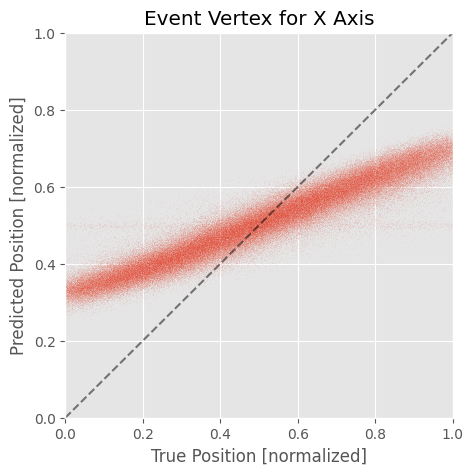

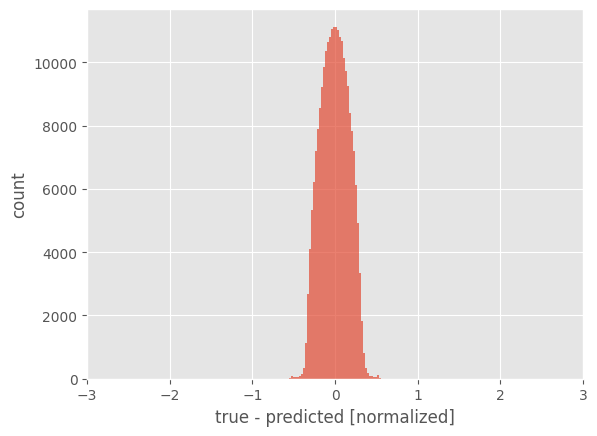

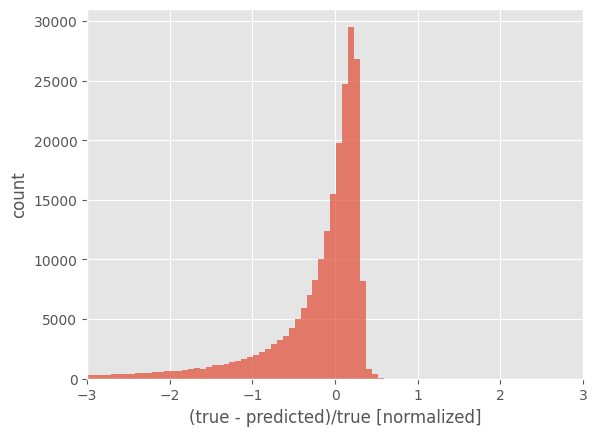

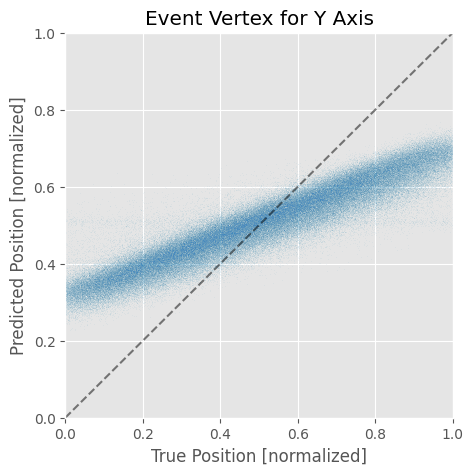

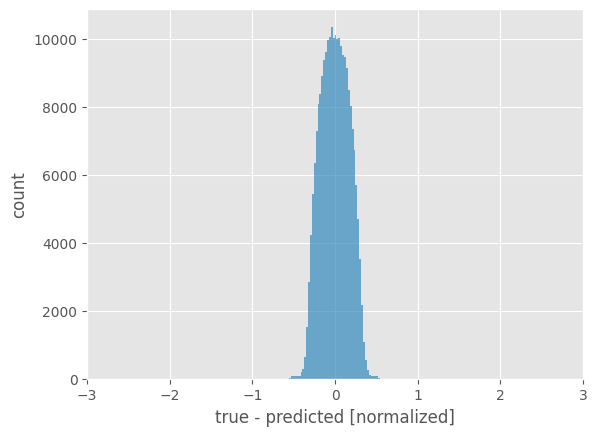

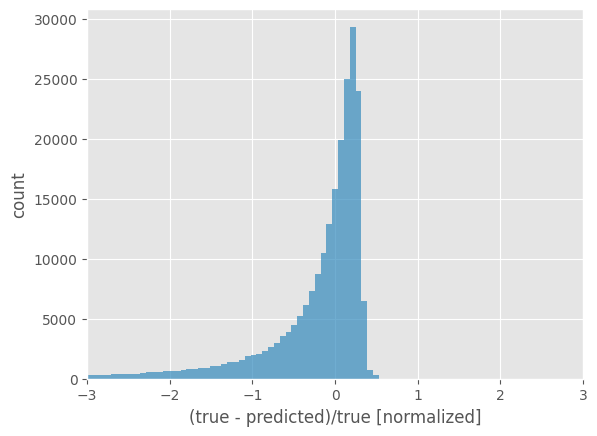

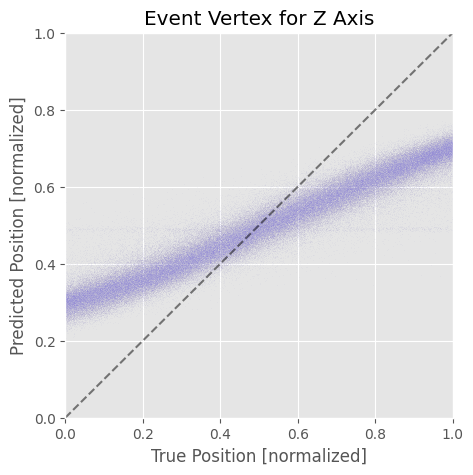

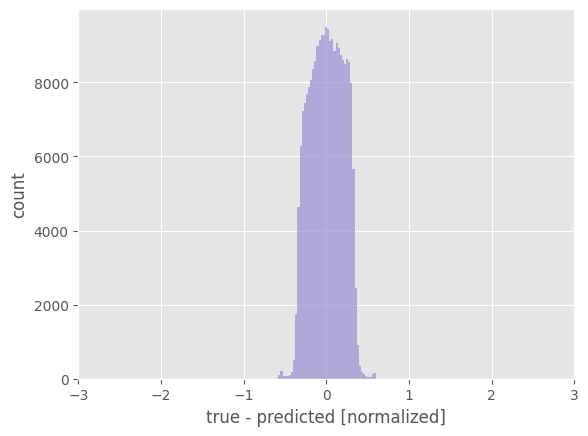

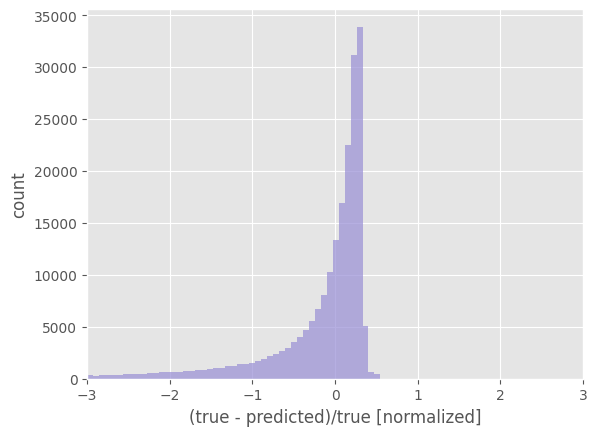

In [38]:
regression_analysis(dirpath='/fast_scratch_2/aferreira/t2k/ml/data/oct20_combine_flatE/20092023-101855/')

In [33]:
! pip install mpltools

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 16.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for mpltools: filename=mpltools-0.2.0-py3-none-any.whl size=35698 sha256=c4132716317805d7119681023b977c2647e917275e999852050ce6b91c27ec38
  Stored in directory: /tmp/pip-ephem-wheel-cache-iq4y0idf/wheels/f2/d5/10/552263ede3a64f7b1498a74672e6b854db6bce42c953978040
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492036 sha256=45e3ca287f8cc12618590e69fd43fc11d427aa4443b899aa6a10f05c4e130d16
  Stored in directory: /tmp/pip-ephem-wheel-cache-iq4y0idf/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built mpltools future

[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from mpltools import style
from mpltools import layout

style.use('ggplot')

figsize = layout.figaspect(scale=1.2)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=figsize)
ax1, ax2, ax3, ax4 = axes.ravel()

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.color_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x+width, y2, width, color=plt.rcParams['axes.color_cycle'][2])
ax3.set_xticks(x+width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.color_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color))
ax4.axis('equal')
ax4.margins(0)

# Remove ticks on top and right sides of plot
for ax in axes.ravel():
    layout.cross_spines(ax=ax)

plt.show()

/home/aferreira/.local/lib/python3.8/site-packages/mpltools/style/__init__.py:33: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  warn("""


KeyError: 'axes.color_cycle is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

things to compare:
- normalized vs not
- souly regression vs shared network
+ try heatmap
